importamos las librerias necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

damos un vistado al archvivo E-Commerce_test.xlsx y comprobamos que no tiene ningun dato faltante 

In [4]:
df_test = pd.read_excel("..\E-Commerce_test.xlsx")
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2000 non-null   int64 
 1   Warehouse_block      2000 non-null   object
 2   Mode_of_Shipment     2000 non-null   object
 3   Customer_care_calls  2000 non-null   int64 
 4   Customer_rating      2000 non-null   int64 
 5   Cost_of_the_Product  2000 non-null   int64 
 6   Prior_purchases      2000 non-null   int64 
 7   Product_importance   2000 non-null   object
 8   Gender               2000 non-null   object
 9   Discount_offered     2000 non-null   int64 
 10  Weight_in_gms        2000 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 172.0+ KB


damos un vistado al archvivo E-Commerce_test.xlsx y comprobamos que no tiene ningun dato faltante 

In [5]:
df_train = pd.read_excel("..\E-Commerce_train.xlsx")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


unimos nuestros  dos dataframe  para poder hacer mas facil el analis

In [7]:
df = pd.concat([df_train, df_test])
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1.0
1,2,F,Flight,4,5,216,2,low,M,59,3088,1.0
2,3,A,Flight,2,2,183,4,low,M,48,3374,1.0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1.0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,A,Ship,4,1,252,5,medium,F,1,1538,NaN
1996,10996,B,Ship,4,1,232,5,medium,F,6,1247,NaN
1997,10997,C,Ship,5,4,242,5,low,F,4,1155,NaN
1998,10998,F,Ship,5,2,223,6,medium,M,2,1210,NaN


mostramos las cantidad de datos 

In [8]:
df.shape

(10999, 12)

vemos la informacion que tiene nuestro nuevo dataframe 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  8999 non-null   float64
dtypes: float64(1), int64(7), object(4)
memory usage: 1.1+ MB


relizaremos un cambio de valores a nuestros datos en la tabla "Product_importance"
#cambiamos los valors para la columna Product_importance  , low=3 , medium =2 ,high =1

In [10]:
#cambiamos los valors para la columna Product_importance  , low=3 , medium =2 ,high =1
df["Product_importance"]  =df["Product_importance"].replace(["low"],3)
df["Product_importance"]  =df["Product_importance"].replace(["medium"],2)
df["Product_importance"]  =df["Product_importance"].replace(["high"],1)


relizaremos un cambio de valores a nuestros datos en la tabla "Mode_of_Shipment"
#cambiamos los valors para la columna Product_importance  , Flight=2 , Ship =2 ,Road =3

In [11]:
#cambiamos los valors para la columna Product_importance  , Flight=2 , Ship =2 ,Road =3
df["Mode_of_Shipment"]  =df["Mode_of_Shipment"].replace(["Flight"],1)
df["Mode_of_Shipment"]  =df["Mode_of_Shipment"].replace(["Ship"],2)
df["Mode_of_Shipment"]  =df["Mode_of_Shipment"].replace(["Road"],3)


converirmos neustra tabla "Warehouse_block" en valores numericos con la funcion ord

In [12]:
#converitmos el campo Warehouse_block por valores numericos 
df["Warehouse_block"] = np.vectorize(ord)(df["Warehouse_block"])

eliminaremos nuestra columna "gender" 

In [13]:
#eliminamos la columna ID y gender
#df=df.drop(['ID'], axis=1)
#df=df.drop(['Gender'], axis=1)

df["Gender"]  =df["Gender"].replace(["F"],1)
df["Gender"]  =df["Gender"].replace(["M"],0)

renombramos nuestra columnaa 'Reached.on.Time_Y.N" por Reached

In [14]:
# renombramos el nombre de la columna eached.on.Time_Y.N por eached
df.rename(columns={'Reached.on.Time_Y.N':'Reached',},inplace=True)



vizulizamos nuestro neuvo dataframe 

In [15]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached
0,1,68,1,4,2,177,3,3,1,44,1233,1.0
1,2,70,1,4,5,216,2,3,0,59,3088,1.0
2,3,65,1,2,2,183,4,3,0,48,3374,1.0
3,4,66,1,3,3,176,4,2,0,10,1177,1.0
4,5,67,1,2,2,184,3,2,1,46,2484,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,10995,65,2,4,1,252,5,2,1,1,1538,NaN
1996,10996,66,2,4,1,232,5,2,1,6,1247,NaN
1997,10997,67,2,5,4,242,5,3,1,4,1155,NaN
1998,10998,70,2,5,2,223,6,2,0,2,1210,NaN


visualizamos en un histograma  la variable a predecir  

<AxesSubplot:>

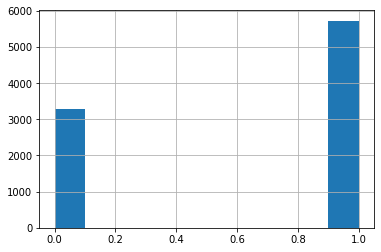

In [16]:
df.Reached.hist()

Analizamos que nuestra columna Discount_offered no tenga datos atipicos 

(array([], dtype=int64),)


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount_offered'>

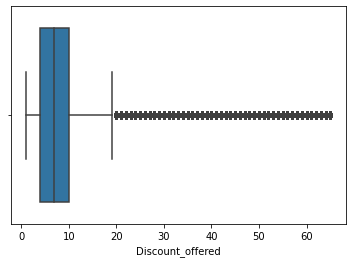

In [17]:
print(np.where(df['Discount_offered']>65))
sns.boxplot(df['Discount_offered'])


creamo una grafica de correlacion 

In [ ]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

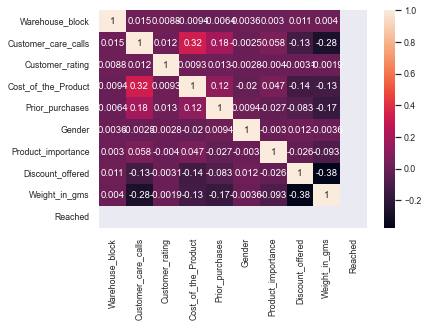

In [ ]:
colum_int =["Warehouse_block","Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases","Gender","Product_importance","Discount_offered","Weight_in_gms","Reached"]
cm =  np.corrcoef(df[colum_int].values.T)
sns.set(font_scale=0.8)
sns.heatmap(cm,annot=True , yticklabels=colum_int, xticklabels=colum_int)

AHORA VOLVEMOS A SEPARAR NUESTROS DAFRAME QUE UNIMO AL PRINCIPIO ESTA VEZ YA SE ENCUENTRAN EN FORMATO NUMERICO TODOS NUESTROS CAMPOS 

volvemos a separar nuestros datos ya convertido en numeros 

nuetro primer datafrme se llamara  data_train que son los datos de nuestor archivo de entrenamiento 

In [19]:
data_train = df.dropna()
data_train['Reached'] = data_train['Reached'].astype(np.int64)

C:\Users\User\AppData\Local\Temp\ipykernel_15108\1080197223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Reached'] = data_train['Reached'].astype(np.int64)


In [20]:
unos = data_train.Reached.sum()
ceros = data_train.Reached.shape[0]-unos
unos,ceros

(5719, 3280)

nuestro  segundo dataframe  se llamara data_test el cual contiene datos del archivo test 

In [21]:
data_test = df.iloc[8999:] # 
data_test=data_test.drop(['Reached'], axis=1)
data_test=data_test.drop(['ID'], axis=1)

In [22]:
np.average(data_train.Reached)

0.6355150572285809

In [23]:
data_train.info(9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   8999 non-null   int64
 1   Warehouse_block      8999 non-null   int32
 2   Mode_of_Shipment     8999 non-null   int64
 3   Customer_care_calls  8999 non-null   int64
 4   Customer_rating      8999 non-null   int64
 5   Cost_of_the_Product  8999 non-null   int64
 6   Prior_purchases      8999 non-null   int64
 7   Product_importance   8999 non-null   int64
 8   Gender               8999 non-null   int64
 9   Discount_offered     8999 non-null   int64
 10  Weight_in_gms        8999 non-null   int64
 11  Reached              8999 non-null   int64
dtypes: int32(1), int64(11)
memory usage: 878.8 KB


modelo de regresion logistica

mostramos nuestros datos 

<AxesSubplot:>

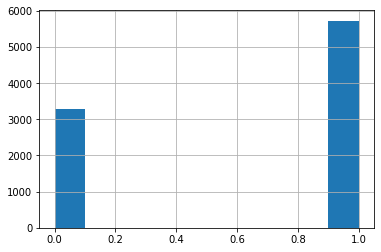

In [24]:
data_train.Reached.hist()

seleccionamos las columans que nos ayudaran a predecir el valor esperado 

In [25]:
feature_cols = ["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"]
x = data_train[feature_cols]
y = data_train.Reached

dividimos nuestros datos para el entrenamiento 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 52)

balancemos nuestros datos con smote 

In [27]:
print("'1': {}".format(sum(y_train == 1))) 
print("'0': {} \n".format(sum(y_train == 0))) 

#Importamos los paquetes
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.over_sampling import SMOTE 

#SMOTE
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 
  

print(' despues train_X: {}'.format(X_train_res.shape)) 
print(' despues train_y: {} \n'.format(y_train_res.shape)) 
  
print(" despues label '1': {}".format(sum(y_train_res == 1))) 
print("despues label '0': {}".format(sum(y_train_res == 0))) 

'1': 4038
'0': 2261 

 despues train_X: (8076, 4)
 despues train_y: (8076,) 

 despues label '1': 4038
despues label '0': 4038


mostramos el procentaje del modelo entrenado 

In [28]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
print(classification_report(y_test, predictions)) 



              precision    recall  f1-score   support

           0       0.54      0.86      0.66      1019
           1       0.87      0.55      0.68      1681

    accuracy                           0.67      2700
   macro avg       0.70      0.71      0.67      2700
weighted avg       0.75      0.67      0.67      2700



creamos nuestro dataframe para poder testearlo con lo datos de test

In [29]:
feature_cols = ["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"]
data_test= data_test[feature_cols]
predictions = lr1.predict(data_test) 


In [30]:
predictions

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

creamos un dataframe para almecenar nuestros resultados 

In [31]:
from sklearn.metrics import accuracy_score 
from  sklearn.metrics import  confusion_matrix
columnas = ['pred'] # definimos los nombres de las columnas
df_predic = pd.DataFrame(predictions,columns=columnas) 
df_predic.to_csv("josleo.csv",index=False)#exportamos los resutladoresultadoss 